In [9]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

In [10]:
robot_d=115
obstacle_list = [[250,800,100,400],[600,300,200,400],[950,800,100,400]]
obstacle_list1 = [[200,700,200,400],[500,700,200,400],[1000,700,200,400]]
obstacle_list2 = [[300,800,400,200],[900,800,400,200],[900,200,400,200]]
r=robot_d/2

In [11]:
def d(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [12]:
def near(p_rand,V):
    p_near=V[0].copy()
    for p in V:
        if d(p.copy(),p_rand.copy())<d(p_near.copy(),p_rand.copy()):
            p_near=p.copy()
    return p_near

In [13]:
def collision(obstacle_list,p):
    r=115/2
    if p[0]<r or p[0]>1200-r or p[1]<r or p[1]>1000-r:
        return False
    else:
        for obstacle in obstacle_list:
            if abs(p[0]-obstacle[0])<(obstacle[2]/2+r) and abs(p[1]-obstacle[1])<(obstacle[3]/2+r):
                return False
        return True

In [24]:
t0 = time.time()
p_int=[100,100]
p_final=[1100,100]
move=True
nodes=[]
path=[]
p_rand=[0,0]
nodes.append(p_int)
step=20
p_new=[100,100]
while move:
    dist=d(p_new,p_final)
    if dist<=step:
        nodes.append(p_final)
        path.append([p_new.copy(),p_final])
        move=False
    else:
        p_rand[0]=random.uniform(0, 1200)
        p_rand[1]=random.uniform(0, 1000)
        p_near=near(p_rand,nodes)
        if d(p_rand,p_near)>step:
            p_new[0]=p_near[0]+step/d(p_rand,p_near)*(p_rand[0]-p_near[0])
            p_new[1]=p_near[1]+step/d(p_rand,p_near)*(p_rand[1]-p_near[1])
        else:
            p_new=p_rand.copy()
        if collision(obstacle_list,p_new):
            nodes.append(p_new.copy())
            path.append([p_near.copy(),p_new.copy()])
        
t1 = time.time()              

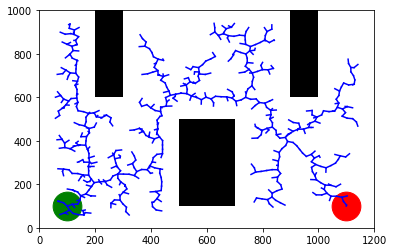

In [25]:
t1 = time.time()
cfig=1
plt.figure()
plt.xlim((0, 1200))
plt.ylim((0, 1000))
ax = plt.gca()
if cfig==1:
    rect1 = patches.Rectangle((200,600),100,400,facecolor='black')
    rect2 = patches.Rectangle((500,100),200,400,facecolor='black')
    rect3 = patches.Rectangle((900,600),100,400,facecolor='black')
elif cfig==2:
    rect1 = patches.Rectangle((100,500),200,400,facecolor='black')
    rect2 = patches.Rectangle((400,500),200,400,facecolor='black')
    rect3 = patches.Rectangle((900,500),200,400,facecolor='black')    
else:
    rect1 = patches.Rectangle((100,700),400,200,facecolor='black')
    rect2 = patches.Rectangle((700,700),400,200,facecolor='black')
    rect3 = patches.Rectangle((700,100),400,200,facecolor='black')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
plt.plot([p_int[0]],[p_int[1]],'green',marker='o',markersize=r/2)
plt.plot([p_final[0]],[p_final[1]],'red',marker='o',markersize=r/2)
for line in path:
    x=[line[0][0],line[1][0]]
    y=[line[0][1],line[1][1]]
    plt.plot(x, y,'blue',linestyle='-',marker='')
plt.show()

In [26]:
t1-t0

0.63763427734375